# Multi-Layer Perceptron (MLP)

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [28]:
# Load the dataset
file_path = 'C:/Users/dugga/OneDrive/Desktop/ML1/ML/data/AAPL.csv'
data = pd.read_csv(file_path)

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [29]:
close_prices = data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))
close_prices_scaled

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [9.27511961e-01],
       [9.35150965e-01],
       [9.56364315e-01]])

In [30]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(close_prices_scaled, seq_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for MLP
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1])

In [31]:
# Define the MLP model
model = Sequential()
model.add(Dense(128, input_dim=seq_length, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

C:\Users\dugga\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,177 (71.00 KB)

 Trainable params: 18,177 (71.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.1960e-06 - val_loss: 2.7445e-05
Epoch 2/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9281e-07 - val_loss: 2.2442e-05
Epoch 3/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8992e-07 - val_loss: 4.8116e-05
Epoch 4/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6207e-07 - val_loss: 1.8494e-05
Epoch 5/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0322e-07 - val_loss: 3.0221e-05
Epoch 6/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7259e-07 - val_loss: 1.6135e-05
Epoch 7/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1490e-07 - val_loss: 1.1452e-05
Epoch 8/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4341e-07 - val_loss: 7.5999e-06
Epoch 9/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5447e-07 - val_loss: 9.0416e-06
Epoch 10/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6889e-07 - val_loss: 2.9617e-05
Epoch 11/25
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

In [34]:
# Evaluate the model on the test set
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_reshaped)

# Inverse transform the predictions and true values to get the original scale
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5161e-04  
Test Loss: 0.001100765774026513
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


RMSE: 6.037061800287061
MAE: 4.383660930334767
MAPE: 6.852417928627701


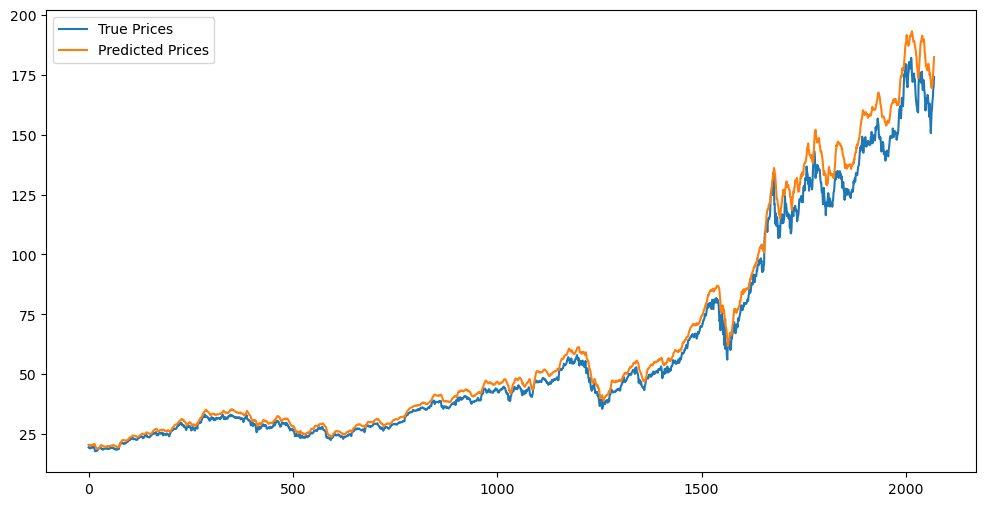

In [35]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the predictions against the true values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()